In [502]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [503]:
df=pd.read_csv('house_data.csv')
df

,sr no,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [504]:
df.shape

(645, 8)

In [505]:
x = df.drop(['sr no', 'Price'], axis=1)
x


,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,1177.698,2,7,2,2,2
1,2134.800,5,7,4,2,2
2,1138.560,5,7,2,2,1
3,1458.780,2,7,3,2,2
4,967.776,11,14,3,2,2
...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2
641,377.148,4,10,1,1,1
642,740.064,13,14,1,1,1
643,1707.840,3,14,3,2,2


In [506]:
y=df['Price']
y

0      62000
1      78000
2      58000
3      45000
4      45000
       ...  
640    45000
641    24800
642    45000
643    65000
644    36000
Name: Price, Length: 645, dtype: int64

In [507]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.8,random_state=1)

In [508]:
x_test.shape

(129, 6)

In [509]:
x_train.shape

(516, 6)

In [510]:
y_test.shape

(129,)

In [511]:
y_train.shape

(516,)

In [512]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [513]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1,10)}

# Create a KNN classifier object
knn = KNeighborsRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best parameter value
best_n_neighbors = grid_search.best_params_['n_neighbors']

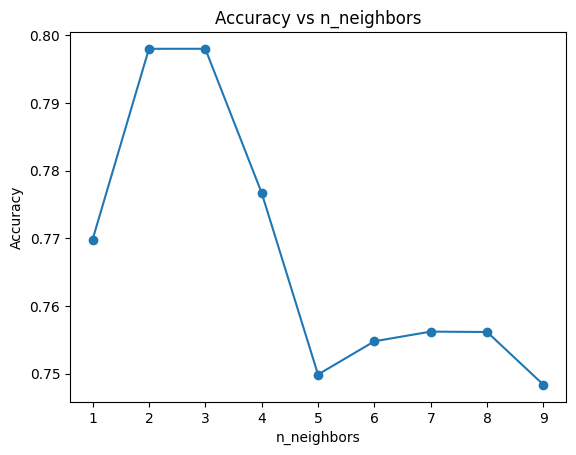

In [514]:
n_neighbors_values = range(1,10)
accuracy_values = []

# Calculate accuracy for different n_neighbors values
for n_neighbors in n_neighbors_values:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)
    accuracy = knn.score(x_test, y_test)
    accuracy_values.append(accuracy)

# Plot accuracy against n_neighbors values
plt.plot(n_neighbors_values, accuracy_values, marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs n_neighbors')
plt.show()

In [515]:
#the above plot shows us that 3 has the highest accuracy so we choose 3 as as the n_neghbors value
y_pred=knn.predict(x_test)
knn.score(x_test,y_test)

0.7483441258881343

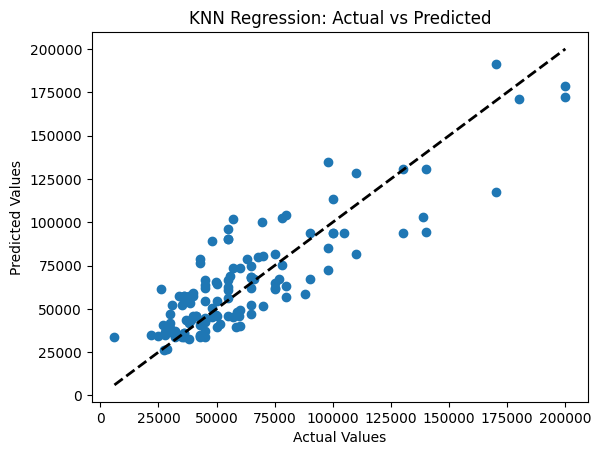

In [516]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Plotting the ideal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: Actual vs Predicted')
plt.show()